In [1]:
import pandas as pd

#Bayesian library for quasi-experimental data to implement synthetic controls
import causalpy as cp

import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
from metpy.units import units
from metpy.calc import specific_humidity_from_dewpoint 

##############################################################################
#Treatment (181 days)
#Pre-treatment (166 days)

#Reduces overfitting

In [2]:
data = pd.read_csv("gt_social_media_data.csv")
data

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52
...,...,...,...,...,...
176,2022-11-07,66,18,23,50
177,2022-11-08,60,18,24,47
178,2022-11-09,64,18,21,45
179,2022-11-10,61,19,22,49


In [30]:
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

In [31]:
data

,twitter,linkedin,tiktok,instagram
date,,,,
2022-05-15,55,9,23,59
2022-05-16,54,18,20,59
2022-05-17,54,20,23,57
2022-05-18,54,20,21,55
2022-05-19,49,23,21,52
...,...,...,...,...
2022-11-07,66,18,23,50
2022-11-08,60,18,24,47
2022-11-09,64,18,21,45


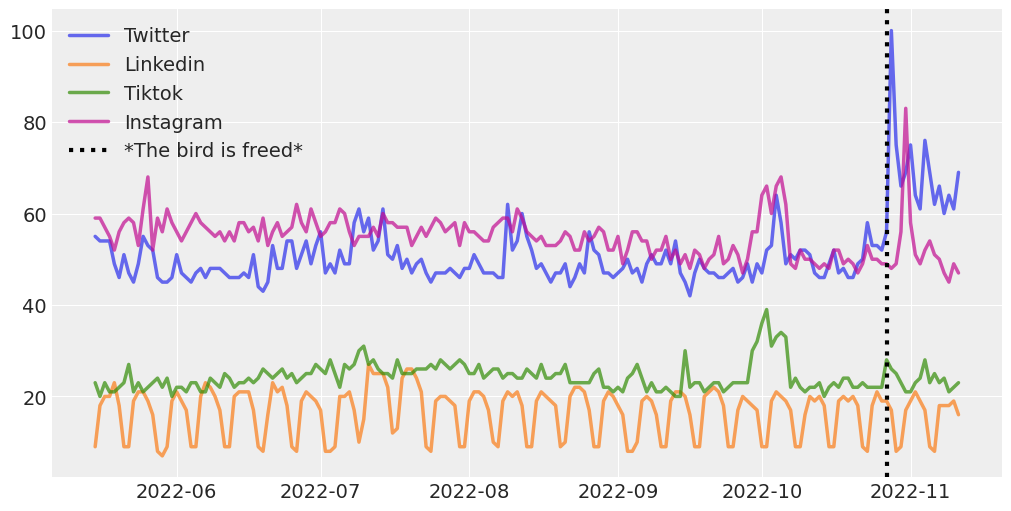

In [36]:
# Plot the data
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [32]:
#Treatment date
treatment_index = pd.to_datetime('2022-10-28')

In [33]:
model = cp.pymc_models.WeightedSumFitter()

In [34]:
# Regression Formula : Predict Twitter using the remainder social medias
# 0 means to not fit to an intercept
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

In [35]:
results = cp.pymc_experiments.SyntheticControl(data,
                                              treatment_index,
                                              formula=formula,
                                              model=model,)

/var/folders/j5/0j3xm4fn1qj5_2y9vvy7j8p80000gn/T/ipykernel_1709/2434643510.py:1: DeprecationWarning: cp.pymc_experiments.SyntheticControl is deprecated and will be removed in a future release. Please use:
        import causalpy as cp
        cp.SyntheticControl(...)
  results = cp.pymc_experiments.SyntheticControl(data,
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, sigma]


/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The 
`ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the 
function `from comm import create_comm`.
  self.comm = Comm(**args)

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The 
`ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the 
function `from comm import create_comm`.
  self.comm = Comm(**args)

Output()

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 46 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.37\n            (std = 0.002)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

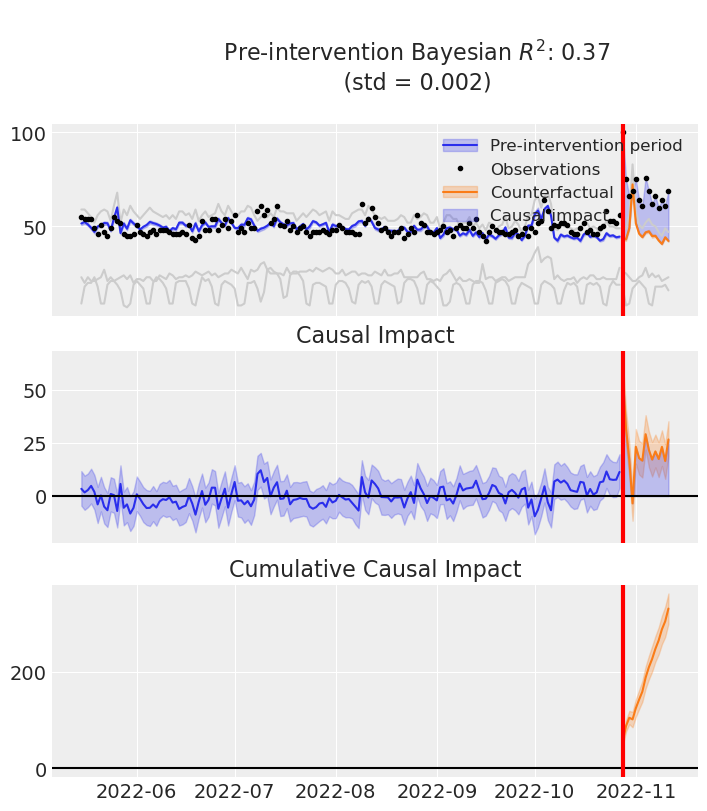

In [27]:
results.plot(plot_predictors=True)

Now, using Meteorological data from M1 and S5 CoURAGE facilities in Baltimore

In [3]:
####################### CONCATENATED DATA TABLE ##########################

In [4]:
cd

/Users/alondraalvarez


In [5]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [6]:
# CSV File
met_files = sorted([f for f in os.listdir("M1_Met_CoRAGE_data") if f.endswith(".csv")])
soil_files = sorted([f for f in os.listdir("S5_Sebs_CoURAGE_data") if f.endswith(".csv")])

In [7]:
m1_day= []
my_time = []
m1_precipitation = []
m1_relative_humid = []
m1_temperature = []
m1_atmos_pressure = []
m1_winds = []

a=0
for file in met_files:
    met_data = pd.read_csv(f"M1_Met_CoRAGE_data/{file}")
    
    ####################### Time Information #############################
    
    day = met_data['base_time']
    time = met_data['time']
    
    ####################### Meteorological Varibles #######################
    
    precipitation  = met_data['org_precip_rate_mean']
    relative_humid = met_data['rh_mean']
    temperature    = met_data['temp_mean'] 
    atmos_pressure = met_data['atmos_pressure']
    wind_speed = met_data['wspd_arith_mean']
    
    ########################################################################
    

    m1_day.extend(day)
    my_time.extend(time)
    
    m1_precipitation.extend(precipitation)
    m1_relative_humid.extend(relative_humid)
    m1_temperature.extend(temperature)
    m1_atmos_pressure.extend(atmos_pressure)
    m1_winds.extend(wind_speed)

df = pd.DataFrame({
    'time': [datetime.strptime(t, "%Y-%m-%d %H:%M:%S") for t in my_time],
    'precip': m1_precipitation,
    'rh': m1_relative_humid,
    'temp': m1_temperature,
    'press': m1_atmos_pressure,
    'wind': m1_winds
})

# Round to 30 min intervals
df['rounded_time'] = df['time'].dt.floor('30T')

df_avg = df.groupby('rounded_time').mean().reset_index()

# Update variables and average every 30 mind
update_days = df_avg['rounded_time'].tolist()
update_precip = df_avg['precip'].tolist()
update_rh = df_avg['rh'].tolist()
update_temp = df_avg['temp'].tolist()
update_press = df_avg['press'].tolist()
update_wind = df_avg['wind']



In [8]:
s5_day= []
s5_time = []
s5_wetness = []
s5_albedo = []
s5_net_radiation = []

a=0

for file in soil_files:
    
    soil_data = pd.read_csv(f"S5_Sebs_CoURAGE_data/{file}")
    
     ####################### Time Information #############################
    
    day = soil_data['base_time']
    time = soil_data['time']
    
    ####################### Meteorological Varibles #######################
    
    wetness  = soil_data['wetness']
    albedo = soil_data['albedo']
    radiation = soil_data['net_radiation']

    ########################################################################
    
    s5_day.extend(day)
    s5_time.extend(time)
    
    s5_albedo.extend(albedo)
    s5_wetness.extend(wetness)
    s5_net_radiation.extend(radiation)

    a = a+1

s5_time_dt = [datetime.strptime(t, "%Y-%m-%d %H:%M:%S") if isinstance(t, str) else t for t in s5_time]

In [9]:
#Verify consistency in dates

print("Lengths:", len(update_days), len(s5_time_dt))
for i, (u, s) in enumerate(zip(update_days, s5_time_dt)):
    if u != s:
        print(f"Difference at index {i}:")
        print(f"update_days[{i}] = {u} ({type(u)})")
        print(f"s5_time_dt[{i}] = {s} ({type(s)})")


Lengths: 9024 9024


In [14]:
df = pd.DataFrame({'time': update_days,
                    'precipitation': update_precip,
                    'relative humidity': update_rh,
                    'temperature' : update_temp,
                    'atmospheric pressure' : update_press,
                    'wind speed' : update_wind,
                    'albedo': s5_albedo,
                    'wetness': s5_wetness,
                    'net radiation': s5_net_radiation})

df.to_csv("M1_meteorological_data.csv", index=False)

data = pd.read_csv("M1_meteorological_data.csv")

# Dew Point
data['dew_point'] = data['temperature'] - ((100 - data['relative humidity']) / 5)

pressure = (data['atmospheric pressure'].values * 10) * units.hPa

dew_point = data['dew_point'].values * units.degC

# Specific Humidity
sh = specific_humidity_from_dewpoint(pressure, dew_point).to('g/kg')

# DataFrame
data['specific_humidity'] = sh.magnitude  # solo los valores numéricos

# # Save updated CSV
data.to_csv("M1_meteorological_data.csv", index=False)


In [14]:
################################## DATA ######################################


In [3]:
cd

/Users/alondraalvarez


In [5]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [8]:
data = pd.read_csv("M1_30_min_meteorological_data.csv")

In [91]:
data.index = pd.to_datetime(data['time'])

non_interest_vars = ['time','net radiation', 'albedo','relative_humidity', 'dew_point', 'atmospheric pressure']

for element in non_interest_vars:
    data = data.drop(element, axis=1)


In [92]:
data=data["2025-05-24":"2025-05-29"]
data

,precipitation,temperature,wetness,specific_humidity
time,,,,
2025-05-24 00:00:00,0.000,15.517000,3.026139,5.422390
2025-05-24 00:30:00,0.000,14.931667,3.025436,5.124555
2025-05-24 01:00:00,0.000,14.216000,3.025072,5.064926
2025-05-24 01:30:00,0.000,13.528000,3.023760,5.068975
2025-05-24 02:00:00,0.000,13.182000,3.022230,5.107790
...,...,...,...,...
2025-05-29 21:30:00,0.000,22.854333,3.023257,11.584160
2025-05-29 22:00:00,0.000,22.951667,3.022759,11.871414
2025-05-29 22:30:00,0.001,22.640333,3.023857,11.553399


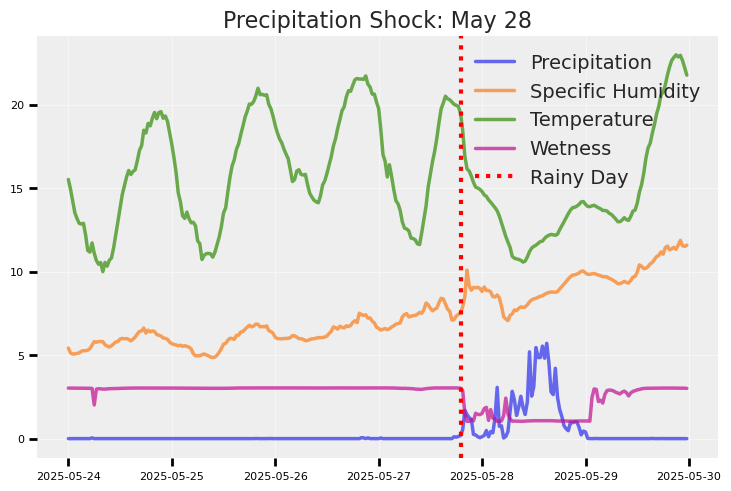

In [83]:
plt.tick_params(direction='out', length=6, width=2, colors='black',
                labelsize= 8,  
                grid_alpha=0.5)

plt.plot(data['precipitation']["2025-05-24":"2025-05-29"], label="Precipitation", lw=2.5, alpha=.7)
plt.plot(data['specific_humidity']["2025-05-24":"2025-05-29"], label="Specific Humidity", lw=2.5, alpha=.7)
plt.plot(data['temperature']["2025-05-24":"2025-05-29"], label="Temperature", lw=2.5, alpha=.7)
plt.plot(data['wetness']["2025-05-24":"2025-05-29"], label="Wetness", lw=2.5, alpha=.7)
plt.title('Precipitation Shock: May 28')

plt.axvline(pd.to_datetime('2025-05-27 19:00'), color='red', lw=3, ls='dotted', label='Rainy Day')
plt.legend()
plt.show()

In [93]:
#Treatment date
treatment_index = pd.to_datetime('2025-05-27 19:00')

In [94]:
model = cp.pymc_models.WeightedSumFitter()

In [95]:
formula_precip = ' precipitation ~ 0 + specific_humidity + temperature + wetness'
formula_rh = ' specific_humidity ~ 0 + precipitation + temperature + wetness'
formula_temp = ' temperature ~ 0 + precipitation + specific_humidity + wetness'

In [96]:
formula = 'precipitation ~ 0 + specific_humidity + temperature + wetness'


In [97]:
results = cp.pymc_experiments.SyntheticControl(data,
                                              treatment_index,
                                              formula=formula,
                                              model=model,)

/var/folders/j5/0j3xm4fn1qj5_2y9vvy7j8p80000gn/T/ipykernel_20698/2434643510.py:1: DeprecationWarning: cp.pymc_experiments.SyntheticControl is deprecated and will be removed in a future release. Please use:
        import causalpy as cp
        cp.SyntheticControl(...)
  results = cp.pymc_experiments.SyntheticControl(data,
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, sigma]


/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The 
`ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the 
function `from comm import create_comm`.
  self.comm = Comm(**args)

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The 
`ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the 
function `from comm import create_comm`.
  self.comm = Comm(**args)

Output()

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 49 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


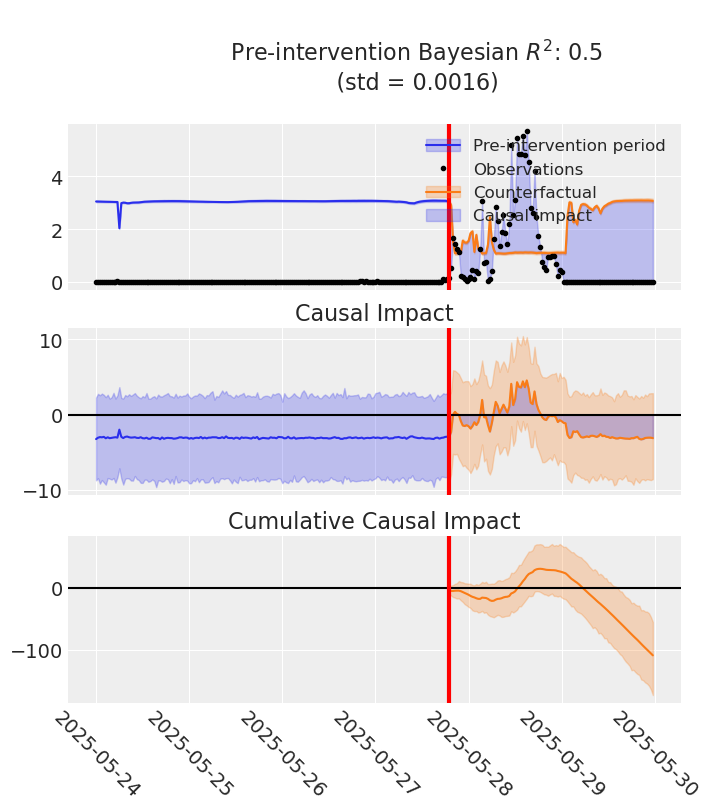

In [98]:

fig, ax = results.plot(plot_predictors=False)
ax[2].tick_params(axis="x", labelrotation=-45)
plt.show()

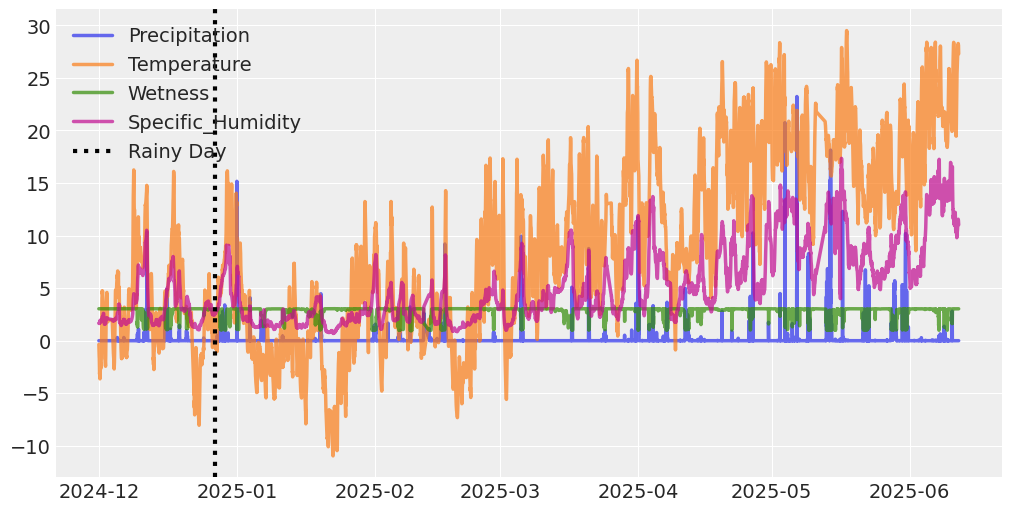

In [97]:
# Plot the data
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2024-12-27'), color='black', lw=3, ls='dotted', label='Rainy Day')
plt.legend()
plt.show()

In [ ]:
################################# PLOTTING ##################################

In [ ]:
data = pd.read_csv("M1_30_min_meteorological_data.csv")
df = 

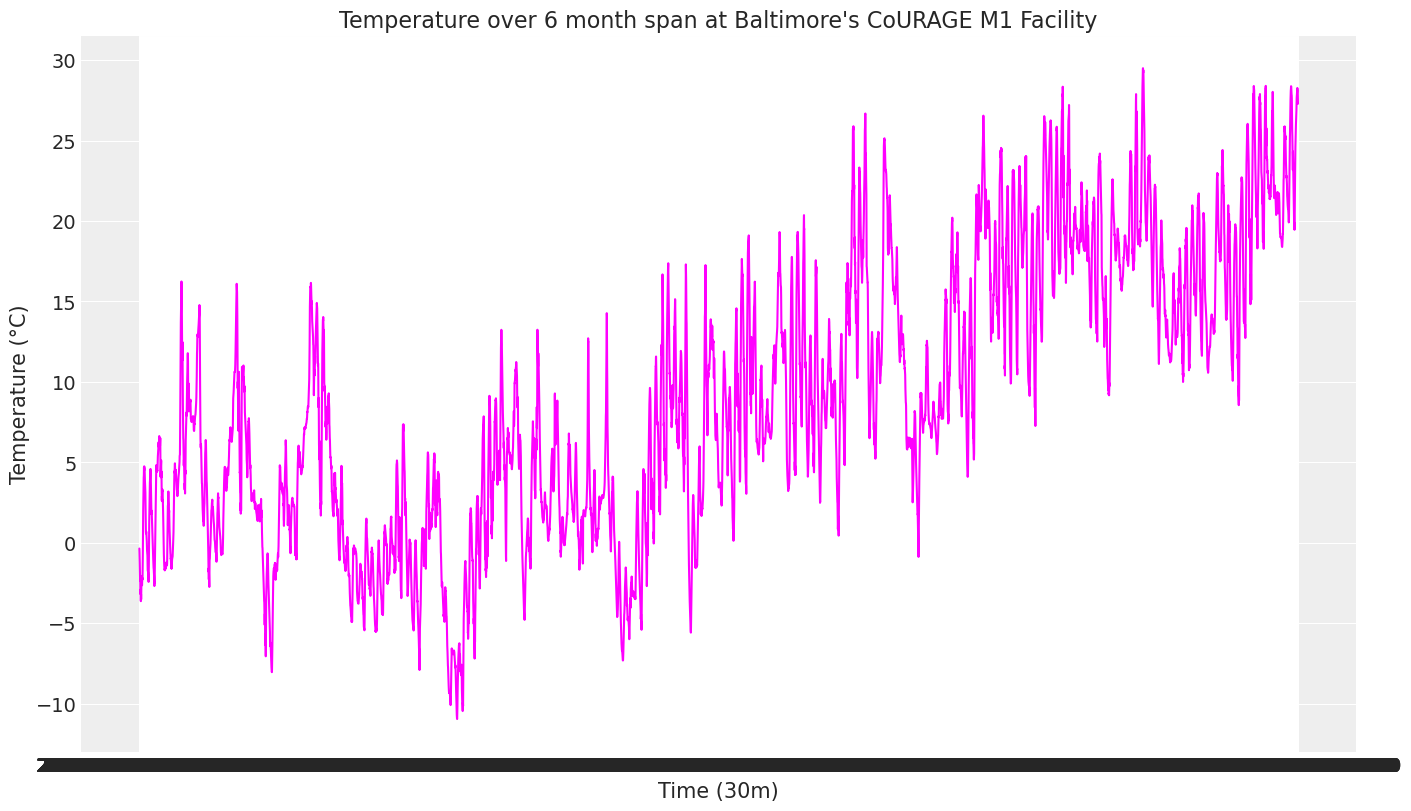

In [9]:
plt.tick_params(direction='out', length=6, width=2, colors='black',
                labelsize= 8,  
                grid_alpha=0.5)

plt.figure(figsize=(14,8))

plt.plot(data['time'],data['temperature'], color = "magenta")
plt.xlabel("Time (30m)")
plt.ylabel("Temperature (°C)")
plt.show()

/var/folders/j5/0j3xm4fn1qj5_2y9vvy7j8p80000gn/T/ipykernel_42392/283212276.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


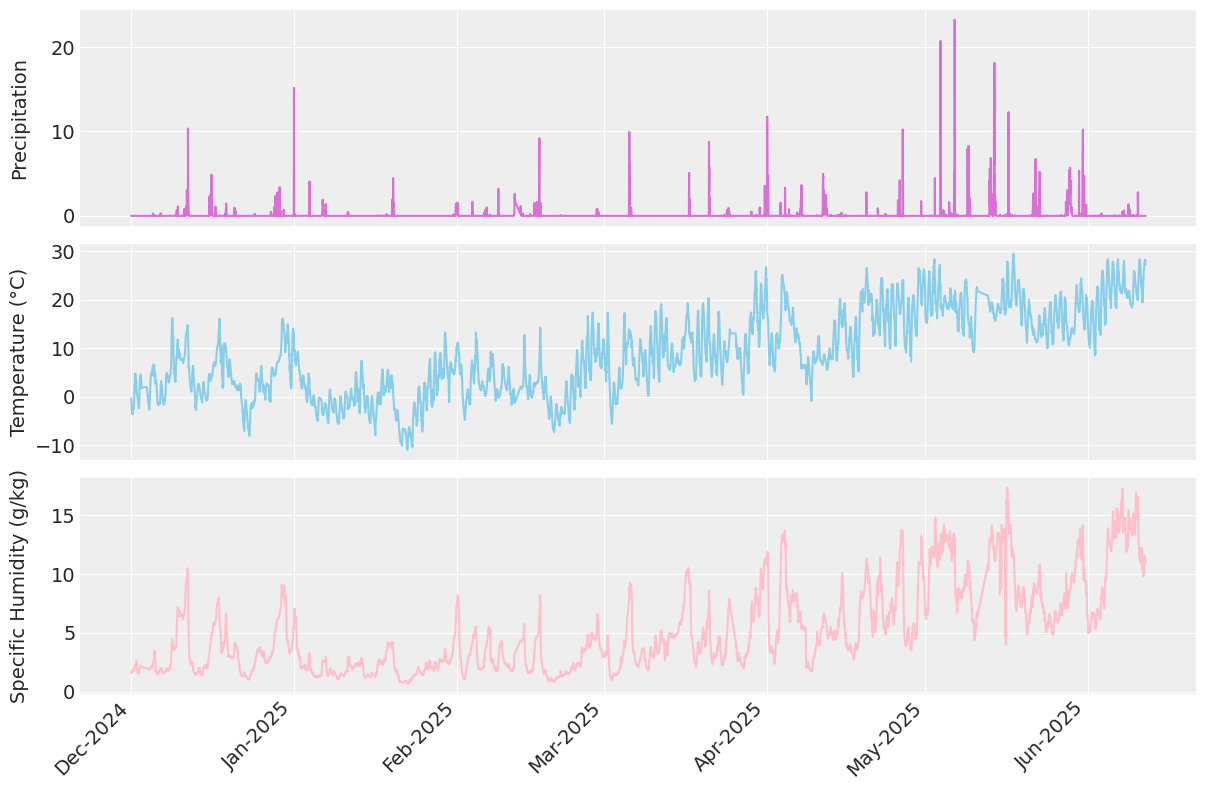

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("M1_30_min_meteorological_data.csv")

df = df.drop('relative humidity', axis=1)
df = df.drop('dew_point', axis=1)
df = df.drop('wind speed', axis=1)
df = df.drop('atmospheric pressure', axis=1)
df = df.drop('wetness', axis=1)
df = df.drop('net radiation', axis=1)
df = df.drop('albedo', axis=1)
#data = data.drop('precipitation', axis=1)

# Asegúrate de que la columna 'time' sea tipo datetime
df['time'] = pd.to_datetime(df['time'])

# Lista de variables (excluyendo 'time')
variables = [col for col in df.columns if col != 'time']
met_vars = ['Precipitation','Temperature (°C)', "Specific Humidity (g/kg)"]

# Crear subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 8), sharex=True)

# Asegurar que axes sea iterable (por si solo hay una variable)
if len(variables) == 1:
    axes = [axes]

# Colores (reutilizables)
colors = ['orchid', 'skyblue', 'pink', 'orange', 'purple', 'brown']

# Graficar cada variable
for i, var in enumerate(variables):
    axes[i].plot(df['time'], df[var], color=colors[i % len(colors)])
    axes[i].set_ylabel(met_vars[i], fontsize=14)
    #axes[i].grid(True, linestyle='--', alpha=0.4)

# Formato de fechas en eje X
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Ej: Jan-2020
axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Cada mes

# Rotar etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig.align_ylabels(axes)
plt.show()
